# Explore here

In [1]:
# Importamos librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import *
import statsmodels.api as sm
import xgboost as xgb

# EDA

In [2]:
# Cargamos el dataframe
df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep = ';')

# Exploramos los datos
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# verificamos la información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Verificamos las estadisticas del dataframe
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Verificamos si existen datos duplicados
df.duplicated().sum()

np.int64(12)

In [6]:
# Eliminamos los datos duplicados
df.drop_duplicates(inplace=True)
df.shape

(41176, 21)

In [7]:
# Verificamos la cantidad de datos faltantes
df.isnull().mean()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

En este datasets como se observa no se tiene datos faltantes

In [8]:
# verificamos los datos únicos del dataframe
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

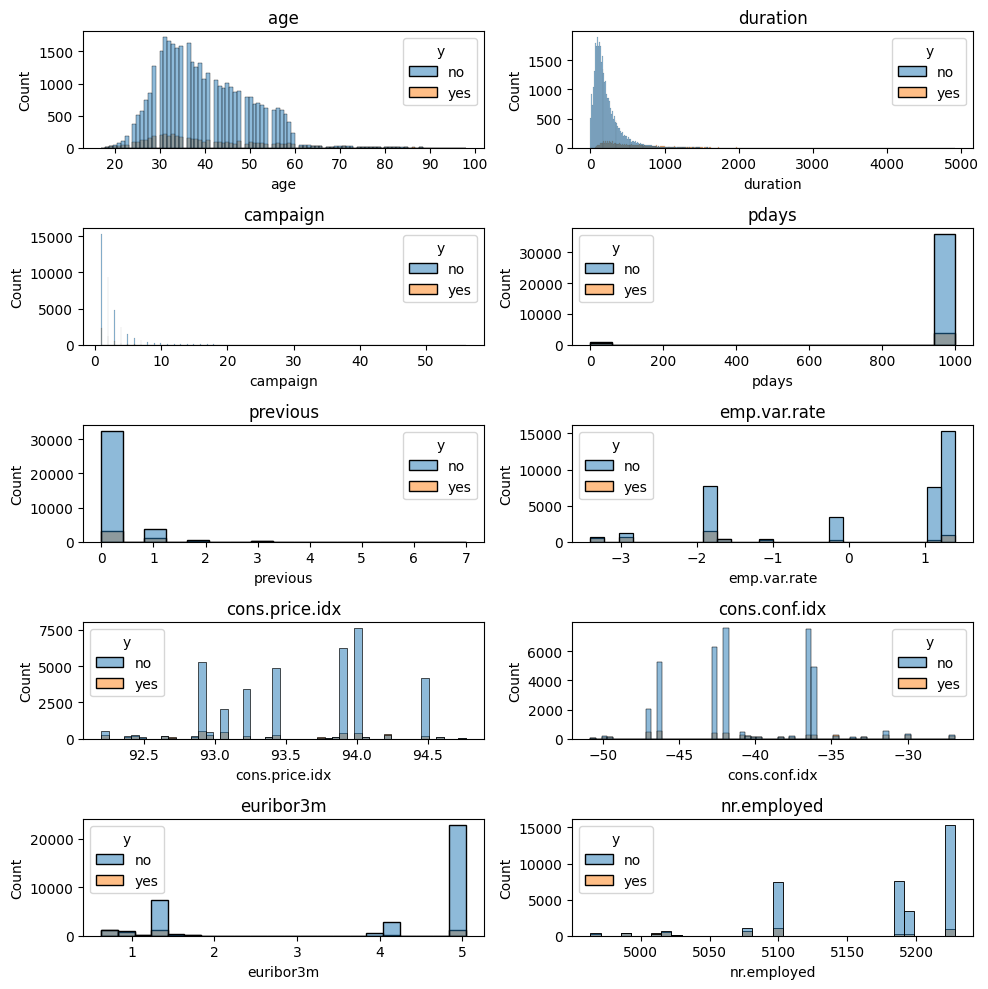

In [9]:
# Seleccionamos las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

#Creamos hisplot para cada una
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()  # Convertimos los ejes en una lista plana para iterar

#Iteramos por cada columna del dataframe y agrupamos con la columna objetivo
for i, columna in enumerate(columnas_numericas):
    sns.histplot(ax=axes[i], x=columna, data=df, hue= 'y')  
    axes[i].set_title(columna)

#Para mostrar el gráfico
plt.tight_layout()
plt.show()

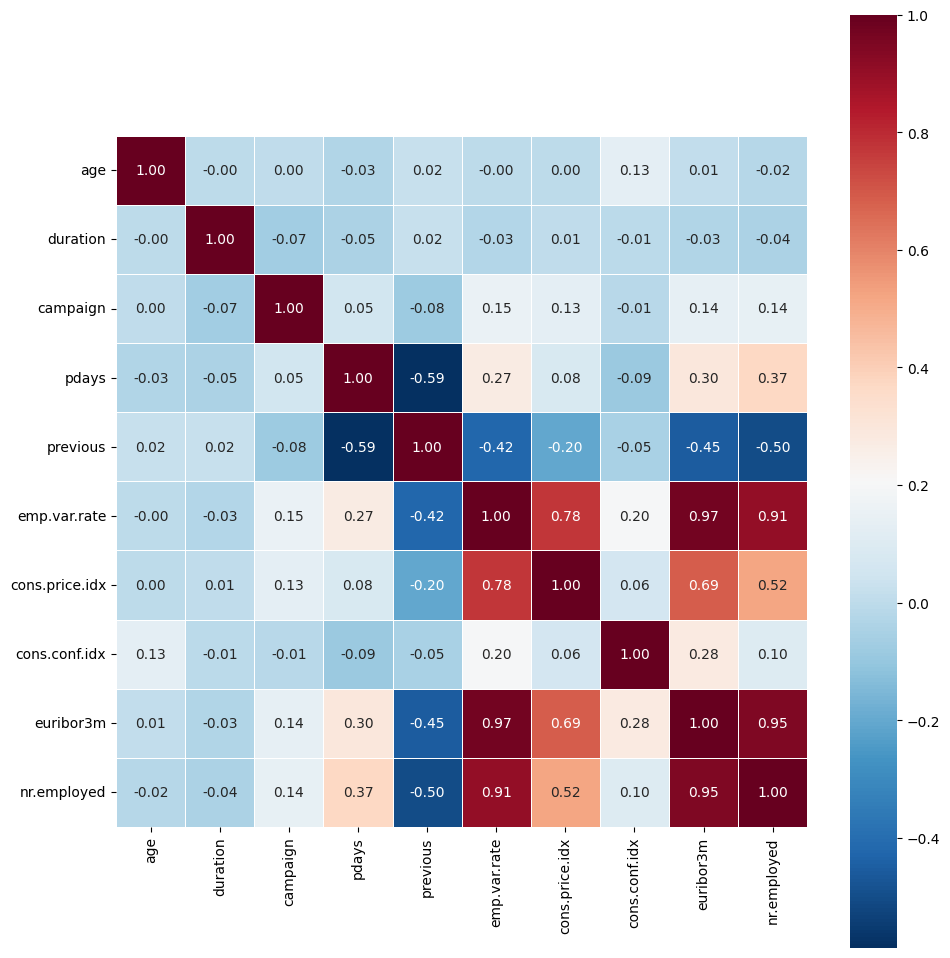

In [10]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype('float64').corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

In [17]:
df['dur_pdays'] = df.duration * df.pdays
df['idx'] = df['cons.conf.idx'] * df['cons.price.idx'] 
df['emp'] = df['emp.var.rate'] * df['nr.employed'] * df['euribor3m']

In [18]:
df1 = df.drop(['duration', 'pdays', 'cons.conf.idx', 'cons.price.idx', 'euribor3m','emp.var.rate', 'nr.employed'], axis = 1)

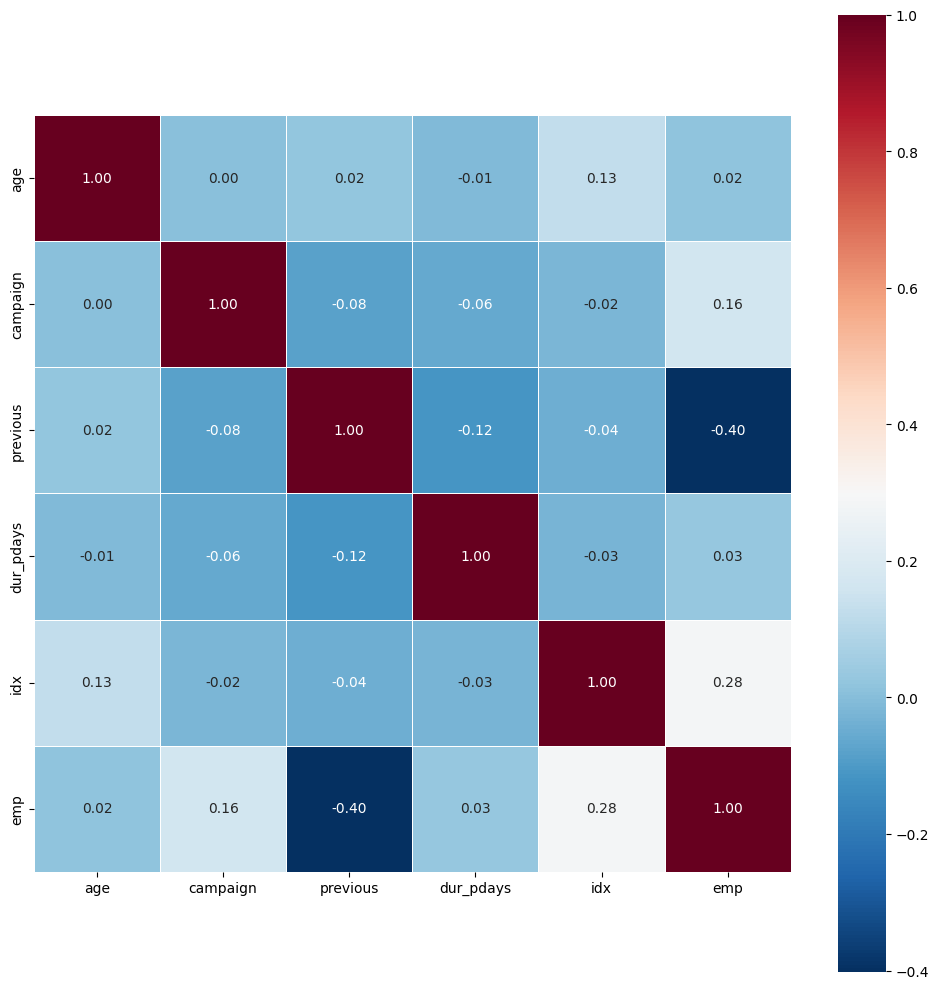

In [19]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df1._get_numeric_data().astype('float64').corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

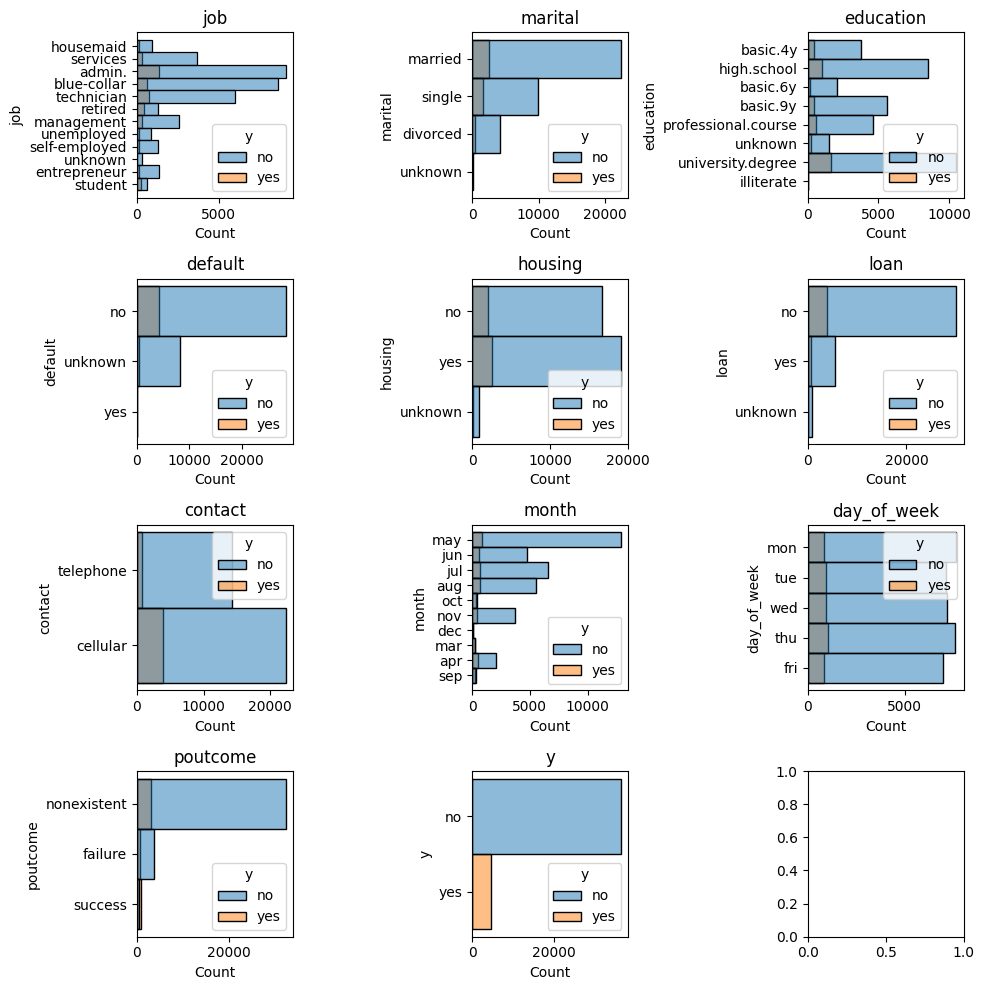

In [22]:
#Seleccionamos las columnas categóricas
columnas_categoricas = df1.select_dtypes(include=['object', 'category']).columns

#Creamos hisplot para cada una
fig, axes = plt.subplots(4, 3, figsize=(10, 10))
axes = axes.flatten()  # Convertimos los ejes en una lista plana para iterar

#Iteramos por cada columna del dataframe y agrupamos con la columna objetivo
for i, columna in enumerate(columnas_categoricas):
    sns.histplot(ax=axes[i], y=columna, data=df1, hue='y')  
    axes[i].set_title(columna)

#Para mostrar el gráfico
plt.tight_layout()
plt.show()

In [23]:
# Factorizamos los datos categóricos
df1[columnas_categoricas] = df1[columnas_categoricas].apply(lambda col: pd.factorize(col)[0])

In [24]:
# Separamos las variables independientes de la dependiente
X = df1.drop(['y'], axis=1)
y = df1['y']

# Ajusta un modelo de regresión lineal
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

In [27]:
# Punto de corte para la distancia de cook
pto_corte = 12/len(df1)

# Viviendas por encima del pto de corte
len(np.where(cooks_distance[0]>pto_corte)[0])

822

In [28]:
# Eliminar observaciones que se consideran influentes
df1.drop(np.where(cooks_distance[0]>pto_corte)[0])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,y,dur_pdays,idx,emp
0,56,0,0,0,0,0,0,0,0,0,1,0,0,0,260739,-3421.3816,27733.95570
1,57,1,0,1,1,0,0,0,0,0,1,0,0,0,148851,-3421.3816,27733.95570
2,37,1,0,1,0,1,0,0,0,0,1,0,0,0,225774,-3421.3816,27733.95570
3,40,2,0,2,0,0,0,0,0,0,1,0,0,0,150849,-3421.3816,27733.95570
4,56,1,0,1,0,0,1,0,0,0,1,0,0,0,306693,-3421.3816,27733.95570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,1,0,0,1,333666,-4814.1636,-5612.83888
41184,46,3,0,4,0,0,0,1,5,4,1,0,0,0,382617,-4814.1636,-5612.83888
41185,56,5,0,6,0,1,0,1,5,4,2,0,0,0,188811,-4814.1636,-5612.83888
41186,44,4,0,4,0,0,0,1,5,4,1,0,0,1,441558,-4814.1636,-5612.83888


In [29]:
# Escalamos las variables para normalizar los datos
scaler = MinMaxScaler()
scal_variable = scaler.fit_transform(df1)
df2 = pd.DataFrame(scal_variable, index = df1.index, columns = df1.columns)
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,y,dur_pdays,idx,emp
0,0.481481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053070,0.598333,0.843728
1,0.493827,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030297,0.598333,0.843728
2,0.246914,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045954,0.598333,0.843728
3,0.283951,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030704,0.598333,0.843728
4,0.481481,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062424,0.598333,0.843728


In [30]:
# Separamos las variables independientes de la dependiente
X = df2.drop(['y'], axis=1)
y = df2['y']

In [31]:
# Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
12,poutcome,64.551491
13,dur_pdays,5.404415
14,idx,5.229901
15,emp,4.262275
8,month,3.249539
4,default,1.996841
9,day_of_week,1.788836
11,previous,1.740116
7,contact,1.739155
3,education,1.695632


In [33]:
selection_model = SelectKBest(chi2)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

In [34]:
X_train_1 = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_1 = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

In [35]:
X_train_1["y"] = list(y_train)
X_test_1["y"] = list(y_test)
X_train_1.to_csv("../data/processed/clean_train.csv", index = False)
X_test_1.to_csv("../data/processed/clean_test.csv", index = False)

In [36]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,job,education,default,contact,month,campaign,previous,poutcome,dur_pdays,emp,y
0,0.909091,0.285714,0.0,0.0,0.222222,0.036364,0.0,0.0,0.058154,0.998544,0.0
1,0.181818,0.857143,0.0,0.0,0.111111,0.090909,0.0,0.0,0.036194,0.985972,0.0
2,0.181818,0.857143,0.0,1.0,0.333333,0.054545,0.0,0.0,0.020943,0.999074,0.0
3,0.181818,0.857143,0.0,0.0,0.000000,0.000000,0.0,0.0,0.027450,0.844037,0.0
4,0.272727,0.142857,0.5,1.0,0.000000,0.000000,0.0,0.0,0.084994,0.128044,0.0


In [37]:
X_train_2 = train_data.drop(["y"], axis = 1)
y_train_2 = train_data["y"]
X_test_2 = test_data.drop(["y"], axis = 1)
y_test_2 = test_data["y"]

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_2, y_train_2)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test_2)
y_pred

array([1., 0., 0., ..., 0., 0., 0.], shape=(8236,))

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_2, y_pred)

0.8859883438562409

In [41]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [42]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_2, y_train_2)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


In [44]:
model = LogisticRegression(C = 0.001, penalty = None, solver = 'newton-cg')
model.fit(X_train_2, y_train_2)

LogisticRegression(C=0.001, penalty=None, solver='newton-cg')

In [45]:
y_pred = model.predict(X_test_2)

In [46]:
accuracy_score(y_test_2, y_pred)

0.8861097620203983

In [51]:
from pickle import dump

dump(model, open("../models/logistic_regression.sav", "wb"))